# Reinforcement Learning

#### run global setup

In [1]:
try:
    with open("../global_setup.py") as setupfile:
        exec(setupfile.read())
except FileNotFoundError:
    print('Setup already completed')

#### run local setup

In [2]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from tqdm import tqdm

from src.utility.widgets import TextAreaSubmit, SliderParameters

from src.rl.CliffworldEnv import CliffworldEnv

from src.rl.RandomAgent import RandomAgent
from src.rl.util import run_episode_ss

from src.rl.TabularQAgent import TabularQAgent
from src.rl.util import run_episode

## What is reinforcement learning?
Reinforcement learning distinguishes itself from supervised or unsupervised learning, mainly in that it aims to solve *sequential decision making* problems. This is a more active framing of the learning problem, and it consists of some fundamental concepts. In reinforcement learning, there is an *agent* that *observes* an *environment*, taking *actions* and receiving *rewards* for doing well. The agent should thus maximize the cumulative reward that it will receive. Centrally in reinforcement learning, we have the *reward hypothesis* [1]:

>That all of what we mean by goals and purposes can be well thought of as
the maximization of the expected value of the cumulative sum of a received
scalar signal (called reward).

Think about this for a bit. Do you agree? Whether you agree or not, this is the basis of reinforcement learning, and certainly a lot of useful goals can be described in this manner. However, it can also be very difficult to describe exactly the goal in your mind using the reward formalism.

## Introduction to reinforcement learning
We're going to be somewhat formal in introducing some common terms and their meanings. However, these notebooks are nonetheless simplified and superficial -- if you're curious, we recommend that you look into the resources referred to at the bottom of this notebook. Here we follow the introductory part of [2].

The **history** is the sequence of observations, actions and rewards

$H_t = O_1, R_1, A_1, \ldots, A_{t-1}, O_t, R_t$,

that is, the sensorimotor stream available to e.g. an animal or a robot. What happens next is determined by the agent using the **state**. Formally, it's a function of the history:

$S_t = f(H_t)$.

A state $S_t$ is **Markov** is and only if

$\mathbb{P}[S_{t+1} | S_t] = \mathbb{P}[S_{t+1} | S_1, \ldots, S_t]$,

that is, the future is independent of the past given the present. Once this state is known, the history can be discarded. Most reinforcement learning algorithms assume the Markov property, which means that the state space must be designed properly.

Now, a reinforcement learning agent consists of some of these parts:
- Policy: the agent's behavior function.
- Value function: the agent's idea of how good a state or action is.
- Model: the agent's representation of the environment.

In general, a policy simply selects an action as a function of the current state, i.e. $a = \pi(s)$. A value function is a prediction of cumulative future reward, which is exactly what we want the agent to maximize -- so we can also derive a policy from the value function. The model predicts what the environment will do next, and is used in model-based reinforcement learning, which we won't get into in these notebooks. Hence, we only look at model-free reinforcement learning.

## Exploration and exploitation
Another central concept in reinforcement learning is the tradeoff between exploration and exploitation. Since reinforcement learning is about trial-and-error, the agent needs to discover a good policy through interaction with the environment without losing too much reward along the way. Hence, the agent can explore to discover more information about the environment, or it can exploit its current knowledge to maximize the reward it currently thinks it will achieve. Both are important in order to achieve good performance, and many successful algorithms are designed with this in mind.

## Cliff World

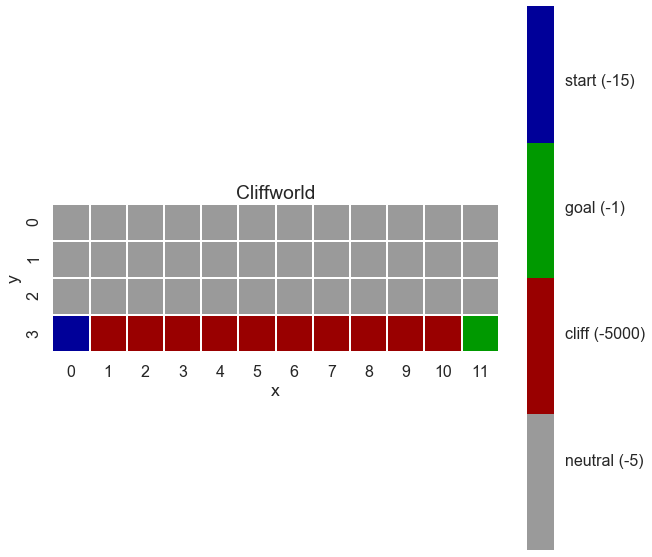

In [3]:
sns.set(rc={'figure.figsize': (15, 15)})
states_colors = ListedColormap(
    ['#9A9A9A', '#D886BA', '#4D314A', '#6E9183'])
cmap_default = 'Blues'
cpal_default = sns.color_palette(("Blues_d"))


random.seed(1)

env = CliffworldEnv()
env.render(mode='reward')

In [4]:
TextAreaSubmit(submit_func=env.build_world,
              default_text = 12*'N'+'\n'+12*'N'+'\n'+12*'N'+'\n'+'S'+10*'C'+'G')
SliderParameters(env.set_rewards,{'name': 'neutral', 'min': -10, 'max': 0},{'name': 'cliff', 'min': -5000, 'max': 0},
                 {'name': 'goal', 'min': -10, 'max': 0},{'name': 'start', 'min': -10, 'max': 0})

Box(children=(Textarea(value='NNNNNNNNNNNN\nNNNNNNNNNNNN\nNNNNNNNNNNNN\nSCCCCCCCCCCG', layout=Layout(height='1…

Box(children=(IntSlider(value=-10, continuous_update=False, description='neutral', max=0, min=-10), IntSlider(…

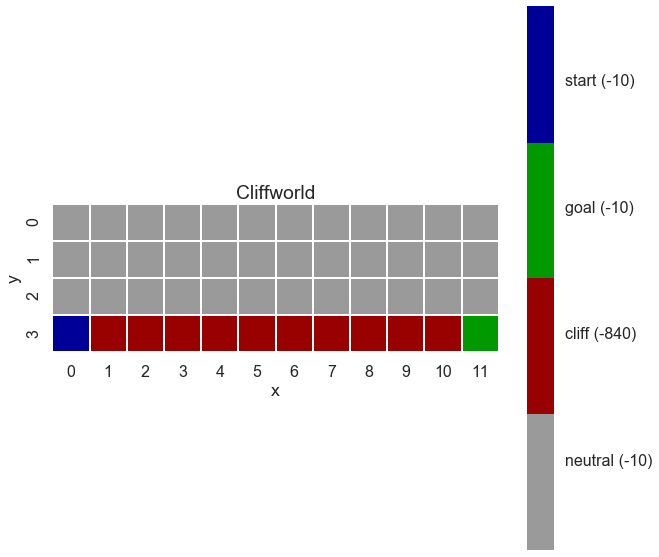

In [11]:
env.render(mode='reward')

Reward achieved:  -870


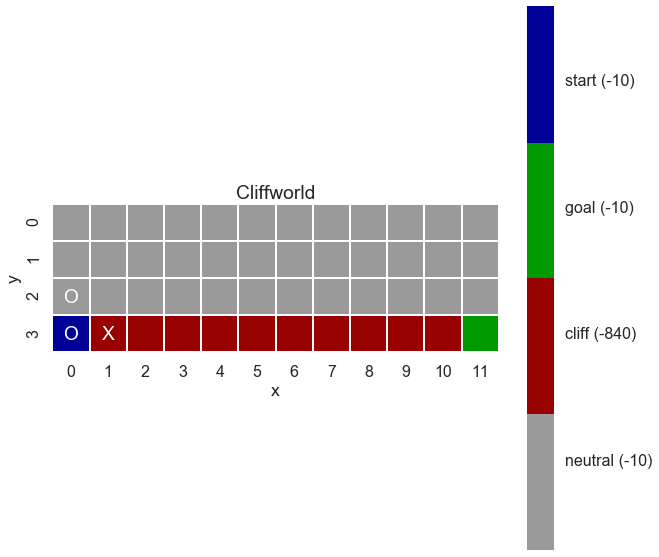

In [12]:
agent = RandomAgent()
sum_r, ss = run_episode_ss(env, agent)

env.render(mode='path', ss=ss)
print("Reward achieved: ", sum_r)

Trained for  5000  episodes. Last episode achieved a reward of  -130 . Last episode run: 


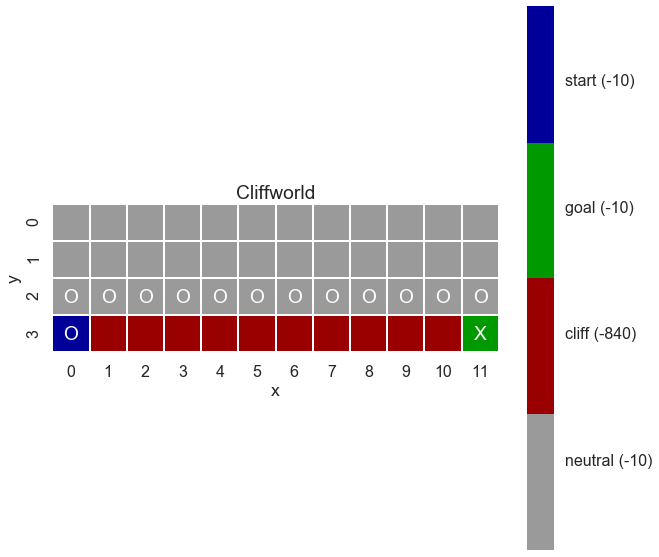

In [13]:
def run_experiment(env, agent, epsilon_decay, n_episodes) -> list:
    rewards = []
    for i in tqdm(range(n_episodes)):
        sum_r = run_episode(env, agent, learn=True, max_length=5000)
        rewards.append(sum_r)
        agent.epsilon *= epsilon_decay
    agent.epsilon = 0
    sum_r, ss = run_episode_ss(env, agent)
    print('Trained for ', n_episodes, ' episodes. Last episode achieved a reward of ', sum_r, '. Last episode run: ')     
    env.render(mode='path', ss=ss)
    return rewards


alpha = 0.1  # learning rate
epsilon = 1.0  # initial randomness
gamma = 1.0  # discount factor
agent = TabularQAgent(alpha, epsilon, gamma)

rewards = run_experiment(env, agent, 0.999, 5000)

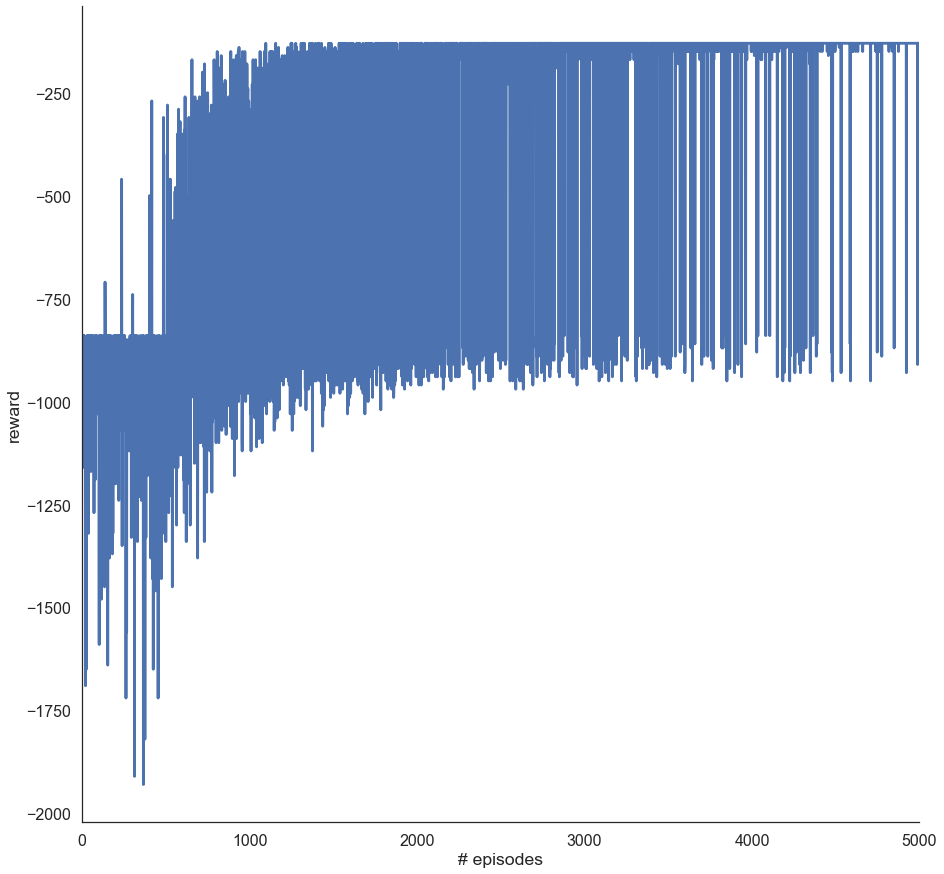

In [14]:
figure = sns.tsplot(rewards)
figure.set(xlabel='# episodes', ylabel='reward')
sns.despine()

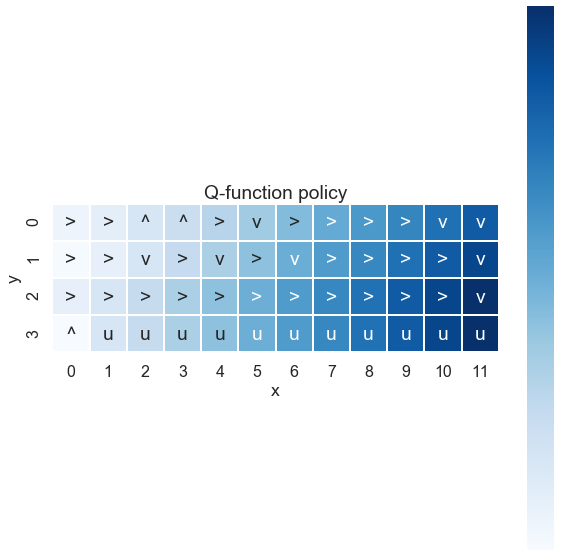

In [9]:
env.render(mode='policy', Q=agent.Q, A=agent.A)

## References and further reading

[1] [Reinforcement Learning: An Introduction, 2nd edition, by Richard S. Sutton and Andrew G. Barto. Free draft.](http://incompleteideas.net/book/the-book-2nd.html)

[2] [David Silver's course on reinforcement learning (with videos).](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html)
